In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
from os.path import join as pjoin
from scipy.stats import sem, pearsonr
from scipy.io import loadmat
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt, colors
from statsmodels.stats.multitest import multipletests
from magicbox.algorithm.plot import show_bar_value
from nibrain.util.plotfig import auto_bar_width
from cxy_hcp_ffa.lib.predefine import roi2color, net2label_cole,\
    mmp_name2label

proj_dir = '/nfs/t3/workingshop/chenxiayu/study/FFA_pattern'
anal_dir = pjoin(proj_dir, 'analysis/s2/1080_fROI/refined_with_Kevin')
work_dir = pjoin(anal_dir, 'paper_fig')

# 画出各分组人数百分比

width: 0.3333333333333333


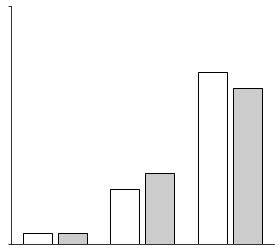

In [10]:
figsize = (4, 3.6)
n_subj = 1080
hemis = ('lh', 'rh')
hemi2color = {'lh': 'w', 'rh': (0.8, 0.8, 0.8, 1)}

gnames = ('single ', 'continuous', 'separate')
gids = ((-1, 0), (1,), (2,))
gid_file = pjoin(anal_dir, 'grouping/group_id_v2.csv')

# out_file = None
out_file = pjoin(work_dir, 'grouping_incidence_rate.jpg')

n_gid = len(gnames)
n_hemi = len(hemis)
gid_df = pd.read_csv(gid_file)

x = np.arange(n_gid)
width = auto_bar_width(x, n_hemi)
print('width:', width)
offset = -(n_hemi - 1) / 2
_, ax = plt.subplots(figsize=figsize)
for hemi in hemis:
    gid_vec = gid_df[hemi]
    assert len(gid_vec) == n_subj
    y = np.zeros(n_gid, np.float64)
    for gid_idx, gid in enumerate(gids):
        gid_idx_vec = np.zeros(n_subj, bool)
        for g in gid:
            gid_idx_vec = np.logical_or(gid_idx_vec, gid_vec == g)
        y[gid_idx] = np.mean(gid_idx_vec) * 100
    rects = ax.bar(x+1.2*width*offset, y, width, label=hemi,
                   fc=hemi2color[hemi], ec='k')
    # show_bar_value(rects, '.1f')
    offset += 1
# ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(gnames)
# ax.set_ylabel('Percentage of population')
ax.set_yticks([0, 100])
ax.set_yticklabels([0, 100])
ax.tick_params(bottom=False, labelbottom=False, labelleft=False)
# ax.set_title('incidence rates')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 画surface area

lh_pFus1: 0
lh_pFus2: 0
lh_mFus1: 0
lh_mFus2: 0
rh_pFus1: 0
rh_pFus2: 0
rh_mFus1: 0
rh_mFus2: 0


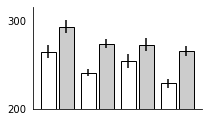

In [5]:
# figsize = None
figsize = (3, 1.8)
data_file = pjoin(anal_dir, 'structure/rois_v3_{hemi}_va.pkl')
hemis = ('lh', 'rh')
n_hemi = len(hemis)
hemi2color = {'lh': 'w', 'rh': (0.8, 0.8, 0.8, 1)}
rois = ('pFus-face', 'mFus-face')
n_roi = len(rois)
gids = (1, 2)
n_gid = len(gids)
gid_file = pjoin(anal_dir, 'grouping/group_id_{hemi}.npy')
# out_file = None
out_file = pjoin(work_dir, 'grouping_surface_area.jpg')

x = np.arange(n_roi * n_gid)
width = auto_bar_width(x, n_hemi)
offset = -(n_hemi - 1) / 2
_, ax = plt.subplots(figsize=figsize)
xticklabels = []
for hemi_idx, hemi in enumerate(hemis):
    data = pkl.load(open(data_file.format(hemi=hemi), 'rb'))
    gid_vec = np.load(gid_file.format(hemi=hemi))
    y = np.zeros_like(x, np.float64)
    y_err = np.zeros_like(x, np.float64)
    x_idx = 0
    dataset = []
    for roi in rois:
        roi_idx = data['roi'].index(roi)
        meas_vec = data['meas'][roi_idx]
        for gid in gids:
            xticklabel = f"{roi.split('-')[0]}{gid}"
            meas_tmp = meas_vec[gid_vec == gid]
            nan_idx_vec = np.isnan(meas_tmp)
            print(f'{hemi}_{xticklabel}:', np.sum(nan_idx_vec))
            meas_tmp = meas_tmp[~nan_idx_vec]
            y[x_idx] = np.mean(meas_tmp)
            y_err[x_idx] = sem(meas_tmp)
            dataset.append(meas_tmp)
            x_idx += 1
            if hemi_idx == 1:
                xticklabels.append(xticklabel)
    x_tmp = x+1.2*width*offset
    rects = ax.bar(x_tmp, y, width, yerr=y_err,
                   label=hemi, fc=hemi2color[hemi], ec='k')
    # show_bar_value(rects, '.2f')

    # violins = ax.violinplot(dataset, x_tmp, widths=width,
    #                         showmeans=True, showextrema=False)
    # for pc in violins['bodies']:
    #     pc.set_facecolor(hemi2color[hemi])
    #     pc.set_edgecolor('k')
    #     pc.set_alpha(1)
    # violins['cmeans'].set_color('k')
    # ax.scatter(x_tmp, y, marker='o', color='r', s=30, zorder=2)
    # ax.vlines(x_tmp, y-y_err, y+y_err, color='k', linestyle='-', lw=5, zorder=1)

    offset += 1
# ax.set_xticks(x)
# ax.set_xticklabels(xticklabels)
ax.set_yticks([200, 300])
ax.set_yticklabels([200, 300])
# ax.set_ylabel('mm^2')
ax.set_ylim(200)
ax.tick_params(bottom=False, labelbottom=False, left=False)
# ax.set_title('Surface area')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.legend()
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 画测地距离

#lh_pFus-mFus: 1032
#rh_pFus-mFus: 1029


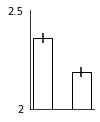

In [15]:
figsize = (3, 3.6)
hemis = ('lh', 'rh')
items = ('pFus-mFus',)
item2color = {'pFus-mFus': 'w'}
data_file = pjoin(anal_dir, 'gdist_peak.csv')
# out_file = None
out_file = pjoin(work_dir, 'geodesic_distance.jpg')

n_hemi = len(hemis)
n_item = len(items)

df = pd.read_csv(data_file)
_, ax = plt.subplots(figsize=figsize)
x = np.arange(n_hemi)
width = auto_bar_width(x, n_item)
offset = -(n_item - 1) / 2
for item in items:
    ys = np.zeros(n_hemi)
    yerrs = np.zeros(n_hemi)
    dataset = []
    for hemi_idx, hemi in enumerate(hemis):
        col = hemi + '_' + item
        data = np.array(df[col])
        data = data[~np.isnan(data)] / 10
        print(f'#{col}: {len(data)}')
        ys[hemi_idx] = np.mean(data)
        yerrs[hemi_idx] = sem(data)
        dataset.append(data)
    x_tmp = x + 1.2 * width * offset

    # plot bar
    rects = ax.bar(x_tmp, ys, width, yerr=yerrs, label=item,
                   fc=item2color[item], ec='k')
    # show_bar_value(rects, '.2f')

    # plot violin
    # violins = ax.violinplot(dataset, x_tmp, widths=width,
    #                         showmeans=True, showextrema=False)
    # for pc in violins['bodies']:
    #     pc.set_facecolor(item2color[item])
    #     pc.set_edgecolor('k')
    #     pc.set_alpha(1)
    # violins['cmeans'].set_color('k')

    offset += 1
# ax.legend()
# ax.set_xticks(x)
# ax.set_xticklabels(hemis)
ax.set_ylim(2)
ax.set_yticks([2, 2.5])
ax.set_yticklabels([2, 2.5])
# ax.set_ylabel('cm')
# ax.set_title('Cortical distance\npFus and mFus')
ax.tick_params(bottom=False, labelbottom=False, left=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 画各组ROI的face selectivity

0.25


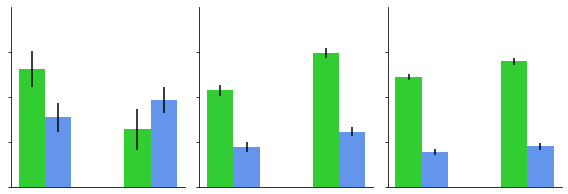

In [6]:
figsize = (8, 2.8)

gids = ((-1, 0), (1,), (2,))
gnames = ('single', 'continuous', 'separate')
gid_file = pjoin(anal_dir, 'grouping/group_id_v2.csv')

hemis = ('lh', 'rh')
rois = ('pFus-face', 'mFus-face')
# src_file = pjoin(anal_dir, 'tfMRI/FFA_activ.csv')
src_file = pjoin(anal_dir, 'tfMRI/FFA_activ-emo.csv')

# out_file = None
out_file = pjoin(work_dir, 'grouping_face_selectivity.jpg')

n_hemi = len(hemis)
n_roi = len(rois)
gid_df = pd.read_csv(gid_file)
src_df = pd.read_csv(src_file)

x = np.arange(n_hemi)
width = auto_bar_width(x, n_roi)
print(width)
_, axes = plt.subplots(1, len(gids), figsize=figsize)
for gid_idx, gid in enumerate(gids):
    ax = axes[gid_idx]
    offset = -(n_roi - 1) / 2
    for roi in rois:
        y = np.zeros(n_hemi, np.float64)
        y_err = np.zeros(n_hemi, np.float64)
        for hemi_idx, hemi in enumerate(hemis):
            gid_vec = gid_df[hemi]
            gid_idx_vec = np.zeros_like(gid_vec, bool)
            for g in gid:
                gid_idx_vec = np.logical_or(gid_idx_vec, gid_vec == g)
            meas = np.array(src_df[f"{hemi}_{roi.split('-')[0]}"])
            meas = meas[gid_idx_vec]
            meas = meas[~np.isnan(meas)]
            y[hemi_idx] = np.mean(meas)
            y_err[hemi_idx] = sem(meas)
        rects = ax.bar(x+width*offset, y, width, yerr=y_err,
                       label=roi, color=roi2color[roi])
        # show_bar_value(rects, '.2f', ax)
        offset += 1
    # if gid_idx == 1:
    #     ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels(hemis)
    # if gid_idx == 0:
    #     ax.set_ylabel('face selectivity')
    ax.set_ylim(4, 8)
    ax.set_yticks([4, 5, 6, 7])
    ax.set_yticklabels([4, 5, 6, 7])
    ax.tick_params(bottom=False, labelbottom=False, labelleft=False)
    # ax.set_title(gnames[gid_idx])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 画各组ROI的myelin, thickness, 和surface area

0.25


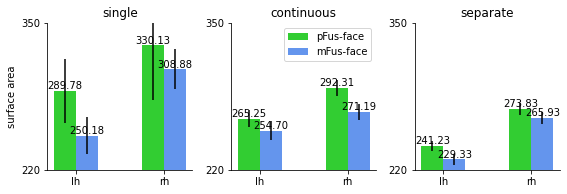

In [5]:
meas_name = 'va'  # myelin, thickness, va
meas2ylim = {
    'myelin': (1.3, 1.45),
    'thickness': (2.5, 3.5),
    'va': (220, 350)
}
meas2tick = {
    'myelin': (1.30, 1.35, 1.40, 1.45),
    'thickness': (2.5, 3.0, 3.5),
    'va': (220, 350)
}
meas2ylabel = {
    'myelin': 'myelination',
    'thickness': 'cortical thickness',
    'va': 'surface area'
}
figsize = (8, 2.8)

gids = ((-1, 0), (1,), (2,))
gnames = ('single', 'continuous', 'separate')
gid_file = pjoin(anal_dir, 'grouping/group_id_v2.csv')

hemis = ('lh', 'rh')
rois = ('pFus-face', 'mFus-face')
src_file = pjoin(anal_dir, f'structure/FFA_{meas_name}.csv')
out_file = None
out_file = pjoin(work_dir, f'grouping_{meas_name}.jpg')

n_hemi = len(hemis)
n_roi = len(rois)
src_df = pd.read_csv(src_file)
gid_df = pd.read_csv(gid_file)

x = np.arange(n_hemi)
width = auto_bar_width(x, n_roi)
print(width)
_, axes = plt.subplots(1, len(gids), figsize=figsize)
for gid_idx, gid in enumerate(gids):
    ax = axes[gid_idx]
    offset = -(n_roi - 1) / 2
    for roi in rois:
        y = np.zeros(n_hemi, np.float64)
        y_err = np.zeros(n_hemi, np.float64)
        for hemi_idx, hemi in enumerate(hemis):
            gid_vec = gid_df[hemi]
            gid_idx_vec = np.zeros_like(gid_vec, bool)
            for g in gid:
                gid_idx_vec = np.logical_or(gid_idx_vec, gid_vec == g)
            meas = np.array(src_df[f"{hemi}_{roi.split('-')[0]}"])
            meas = meas[gid_idx_vec]
            meas = meas[~np.isnan(meas)]
            y[hemi_idx] = np.mean(meas)
            y_err[hemi_idx] = sem(meas)
        rects = ax.bar(x+width*offset, y, width, yerr=y_err,
                       label=roi, color=roi2color[roi])
        show_bar_value(rects, '.2f', ax)
        offset += 1
    if gid_idx == 1:
        ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels(hemis)
    if gid_idx == 0:
        ax.set_ylabel(meas2ylabel[meas_name])
    ax.set_ylim(*meas2ylim[meas_name])
    ax.set_yticks(meas2tick[meas_name])
    ax.set_yticklabels(meas2tick[meas_name])
    # ax.tick_params(bottom=False, labelbottom=False, labelleft=False)
    ax.set_title(gnames[gid_idx])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# radar plot of RSFC for each group

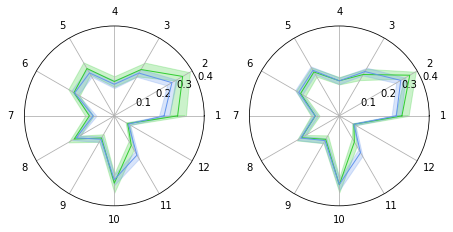

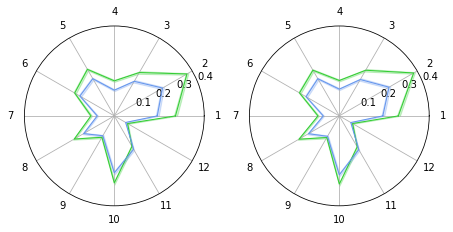

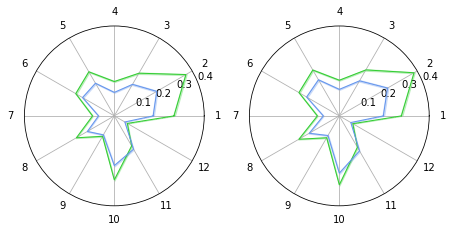

1 Primary Visual
2 Secondary Visual
3 Somatomotor
4 Cingulo-Opercular
5 Dorsal-attention
6 Language
7 Frontoparietal
8 Auditory
9 Default
10 Posterior Multimodal
11 Ventral Multimodal
12 Orbito-Affective


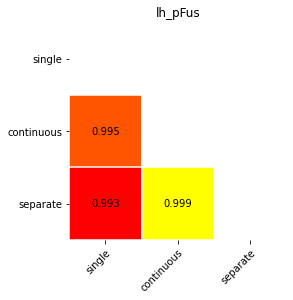

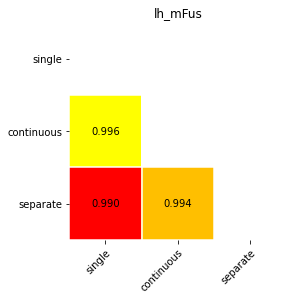

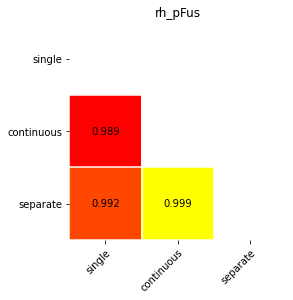

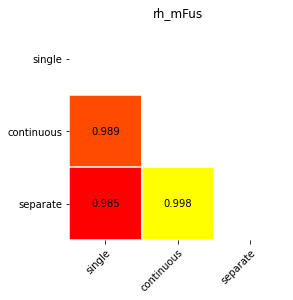

In [11]:
gids = ((-1, 0), (1,), (2,))
gnames = ('single', 'continuous', 'separate')
gid_file = pjoin(anal_dir, 'grouping/group_id_v2.csv')

target = 'Cole'  # MMP, Cole
if target == 'Cole':
    figsize = (6.4, 4.8)
    trg_name2label = net2label_cole
    src_file = pjoin(anal_dir, 'rfMRI/rsfc_FFA2Cole.mat')
    out_file = pjoin(work_dir, '{}_radar_Cole.jpg')
    ylim = (0, 0.4)
    yticks = [0.1, 0.2, 0.3, 0.4]
elif target == 'MMP':
    figsize = (6.4, 4.8)
    trg_name2label = mmp_name2label
    src_file = pjoin(anal_dir, 'rfMRI/rsfc_FFA2MMP.mat')
    out_file = pjoin(work_dir, '{}_radar_MMP.jpg')
    ylim = (0, 0.5)
    yticks = [0.1, 0.3, 0.5]
else:
    raise ValueError

out_file = None
hemis = ('lh', 'rh')
seed_names = ('pFus', 'mFus')

n_hemi = len(hemis)
data = loadmat(src_file)
gid_df = pd.read_csv(gid_file)
trg_label2name = {}
for k, v in trg_name2label.items():
    trg_label2name[v] = k
trg_labels = data['target_label'][0]
trg_names = [trg_label2name[_] for _ in trg_labels]
n_trg = len(trg_labels)

angles = np.linspace(0, 2 * np.pi, n_trg, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
radar_dict = {}
for gid_idx, gid in enumerate(gids):
    _, axes = plt.subplots(1, n_hemi, subplot_kw=dict(polar=True),
                           figsize=figsize)
    for hemi_idx, hemi in enumerate(hemis):
        ax = axes[hemi_idx]
        gid_idx_vec = np.zeros_like(gid_df[hemi], bool)
        for g in gid:
            gid_idx_vec = np.logical_or(gid_idx_vec, gid_df[hemi] == g)
        for seed_name in seed_names:
            item = f'{hemi}_{seed_name}'
            means = np.ones(n_trg) * np.nan
            errs = np.ones(n_trg) * np.nan
            for trg_idx in range(n_trg):
                samples = data[item][:, trg_idx][gid_idx_vec]
                samples = samples[~np.isnan(samples)]
                means[trg_idx] = np.mean(samples)
                errs[trg_idx] = sem(samples)
            radar_dict[f'{hemi}_{gnames[gid_idx]}_{seed_name}'] = means
            means = np.r_[means, means[0]]
            # errs = np.r_[errs, errs[0]] * 2
            errs = np.r_[errs, errs[0]]
            ax.plot(angles, means, linewidth=1,
                    linestyle='solid', label=seed_name,
                    color=roi2color[f'{seed_name}-face'])
            ax.fill_between(angles, means-errs, means+errs,
                            color=roi2color[f'{seed_name}-face'], alpha=0.25)
        # ax.legend(loc='upper center')
        if target == 'Cole':
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(trg_labels)
        if ylim is not None:
            ax.set_ylim(*ylim)
        if yticks is not None:
            ax.set_yticks(yticks)
            ax.set_yticklabels(yticks)
        ax.grid(axis='y')

    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file.format(gnames[gid_idx]))

if target == 'Cole':
    for lbl, name in zip(trg_labels, trg_names):
        print(lbl, name)

# calculate correlations between radars
n_gid = len(gnames)
img_ticks = np.arange(n_gid)
for hemi in hemis:
    for seed_name in seed_names:
        arr = np.ones((n_gid, n_gid), np.float64) * np.nan
        for j, gname1 in enumerate(gnames[:-1]):
            v1 = radar_dict[f'{hemi}_{gname1}_{seed_name}']
            for i, gname2 in enumerate(gnames[j+1:], j+1):
                v2 = radar_dict[f'{hemi}_{gname2}_{seed_name}']
                arr[i, j] = pearsonr(v1, v2)[0]
        _, ax = plt.subplots()
        img = ax.imshow(arr, 'autumn')
        ax.set_xticks(img_ticks)
        ax.set_xticklabels(gnames)
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")
        ax.set_yticks(img_ticks)
        ax.set_yticklabels(gnames)
        ax.set_title(f'{hemi}_{seed_name}')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        grid_ticks = np.r_[img_ticks-.5, img_ticks[-1]+.5]
        ax.set_xticks(grid_ticks, minor=True)
        ax.set_yticks(grid_ticks, minor=True)
        ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
        ax.tick_params(which="minor", bottom=False, left=False)

        for i in range(n_gid):
            for j in range(n_gid):
                if np.isnan(arr[i, j]):
                    continue
                ax.text(j, i, '{:.3f}'.format(arr[i, j]),
                        ha="center", va="center", color="k")

# plot bar for RSFC

0.25


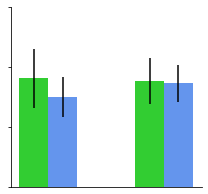

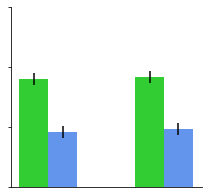

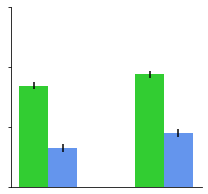

In [7]:
figsize = (3, 2.8)
gids = ((-1, 0), (1,), (2,))
gnames = ('single', 'continuous', 'separate')
gid_file = pjoin(anal_dir, 'grouping/group_id_v2.csv')

target = 'MMP'  # MMP, Cole
if target == 'Cole':
    src_file = pjoin(anal_dir, 'rfMRI/rsfc_FFA2Cole.mat')
    out_file = pjoin(work_dir, '{}_bar_Cole.jpg')
    ylim = (0.1, 0.25)
    yticks = (0.1, 0.15, 0.2, 0.25)
elif target == 'MMP':
    src_file = pjoin(anal_dir, 'rfMRI/rsfc_FFA2MMP.mat')
    out_file = pjoin(work_dir, '{}_bar_MMP.jpg')
    ylim = (0.1, 0.25)
    yticks = (0.1, 0.15, 0.2, 0.25)
else:
    raise ValueError

# out_file = None
hemis = ('lh', 'rh')
seed_names = ('pFus', 'mFus')
data = loadmat(src_file)
gid_df = pd.read_csv(gid_file)

n_hemi = len(hemis)
n_seed = len(seed_names)
x = np.arange(n_hemi)
width = auto_bar_width(x, n_seed)
print(width)
for gid_idx, gid in enumerate(gids):
    _, ax = plt.subplots(figsize=figsize)
    offset = -(n_seed - 1) / 2
    for seed_name in seed_names:
        means = np.ones(n_hemi) * np.nan
        errs = np.ones(n_hemi) * np.nan
        for hemi_idx, hemi in enumerate(hemis):
            item = f'{hemi}_{seed_name}'
            gid_vec = gid_df[hemi]
            gid_idx_vec = np.zeros_like(gid_vec, bool)
            for g in gid:
                gid_idx_vec = np.logical_or(gid_idx_vec, gid_vec == g)
            samples = np.mean(data[item][gid_idx_vec], 1)
            samples = samples[~np.isnan(samples)]
            means[hemi_idx] = np.mean(samples)
            errs[hemi_idx] = sem(samples)
        ax.bar(x+width*offset, means, width, yerr=errs,
               label=seed_name,
               color=roi2color[f'{seed_name}-face'])
        offset += 1
    # show_bar_value(ax.patches, '.3f', ax)
    # ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels(hemis)
    # ax.set_ylabel('pearson R')
    # ax.set_title(f"{gnames[gid_idx]}")
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)
    ax.tick_params(bottom=False, labelbottom=False, labelleft=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file.format(gnames[gid_idx]))

# plot distance between pFus and mFus for each group

#lh_pFus-mFus: 251
#rh_pFus-mFus: 321
#lh_pFus-mFus: 781
#rh_pFus-mFus: 708


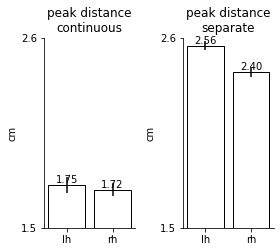

In [5]:
method = 'peak'  # 'peak', 'min', 'min1', 'AP_gap-y', 'AP_gap-geo', 'max'
method2ylim = {
    'peak': (1.5, 2.6),
    'min1': (0.4, 0.8),
    'AP_gap-y': (None, None),
    'AP_gap-geo': (0.8, 1.3),
    'max': (4, 5)
}
figsize = (4, 3.6)

# gids = (2,)
gids = (1, 2)
gid2name = {1: 'continuous', 2: 'separate'}
gid_file = pjoin(anal_dir, 'grouping/group_id_v2.csv')


hemis = ('lh', 'rh')
data_file = pjoin(anal_dir, f'gdist_{method}.csv')

out_file = None
out_file = pjoin(work_dir, f'grouping_distance_{method}.jpg')

n_gid = len(gids)
n_hemi = len(hemis)
gid_df = pd.read_csv(gid_file)
df = pd.read_csv(data_file)

_, axes = plt.subplots(1, n_gid, figsize=figsize)
if n_gid == 1:
    axes = [axes]
x = np.arange(n_hemi)
# width = 0.25
for gid_idx, gid in enumerate(gids):
    ax = axes[gid_idx]
    ys = np.zeros(n_hemi)
    yerrs = np.zeros(n_hemi)
    dataset = []
    for hemi_idx, hemi in enumerate(hemis):
        col = f'{hemi}_pFus-mFus'
        gid_idx_vec = gid_df[hemi] == gid
        data = np.array(df[col])[gid_idx_vec]
        data = data[~np.isnan(data)] / 10
        print(f'#{col}: {len(data)}')
        ys[hemi_idx] = np.mean(data)
        yerrs[hemi_idx] = sem(data)
        dataset.append(data)

    # plot bar
    rects = ax.bar(x, ys, yerr=yerrs, fc='w', ec='k')
    show_bar_value(rects, '.2f', ax)

    # plot violin
#     violins = ax.violinplot(dataset, x, widths=width,
#                             showmeans=True, showextrema=False)
#     for pc in violins['bodies']:
#         pc.set_facecolor('w')
#         pc.set_edgecolor('k')
#         pc.set_alpha(1)
#     violins['cmeans'].set_color('k')

    ax.set_xticks(x)
    ax.set_xticklabels(hemis)
    ax.set_ylim(*method2ylim[method])
    ax.set_yticks(method2ylim[method])
    ax.set_yticklabels(method2ylim[method])
    ax.set_ylabel('cm')
    ax.set_title(f'{method} distance\n{gid2name[gid]}')
    # ax.tick_params(bottom=False, labelbottom=False, labelleft=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)

# 做surface area，cortical thickness, myelination, curvature, face selectivity多个指标之间的两两相关矩阵

#valid subjects: 868


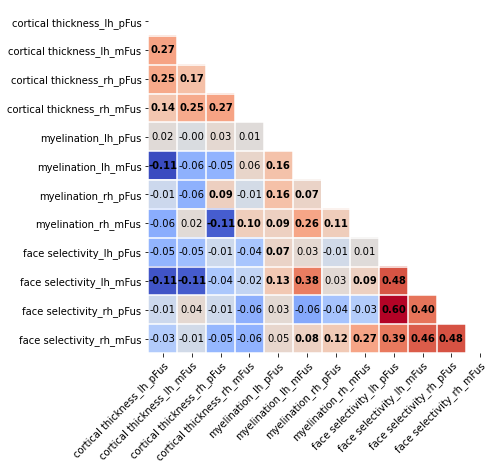

In [4]:
class MidpointNormalize(colors.Normalize):
    # https://matplotlib.org/stable/gallery/userdemo/colormap_normalizations.html
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


figsize = (7, 7)
hemis = ('lh', 'rh')
rois = ('pFus-face', 'mFus-face')
# metrics = ('surface area', 'cortical thickness', 'myelination', 'curvature', 'face selectivity')
# metrics = ('surface area', 'cortical thickness', 'myelination', 'curvature','face selectivity (WM)')
metrics = ('cortical thickness', 'myelination', 'face selectivity')
n_subj = 1080
metric2file = {
    'surface area': pjoin(anal_dir, 'structure/FFA_va.csv'),
    'cortical thickness': pjoin(anal_dir, 'structure/FFA_thickness.csv'),
    'myelination': pjoin(anal_dir, 'structure/FFA_myelin.csv'),
    'curvature': pjoin(anal_dir, 'structure/FFA_curv.csv'),
    'face selectivity': pjoin(anal_dir, 'tfMRI/FFA_activ-emo.csv'),
    'face selectivity (WM)': pjoin(anal_dir, 'tfMRI/FFA_activ.csv')
}

# out_file = None
out_file = pjoin(work_dir, 'metric_corr_mat.jpg')

n_hemi = len(hemis)
n_roi = len(rois)
n_metric = len(metrics)
n_item = n_metric * n_hemi * n_roi

labels = []
data = np.zeros((n_item, n_subj), dtype=np.float64)
idx = 0
for metric in metrics:
    df = pd.read_csv(metric2file[metric])
    for hemi in hemis:
        for roi in rois:
            roi_name = roi.split('-')[0]
            data[idx] = df[f'{hemi}_{roi_name}']
            labels.append(f"{metric}_{hemi}_{roi_name}")
            idx += 1
non_nan_vec = ~np.any(np.isnan(data), 0)
data = data[:, non_nan_vec]
print('#valid subjects:', data.shape[1])
r_arr = np.ones((n_item, n_item), np.float64) * np.nan
p_arr = np.ones((n_item, n_item), np.float64)
for j in range(n_item-1):
    for i in range(j+1, n_item):
        r, p = pearsonr(data[j], data[i])
        r_arr[i, j] = r
        p_arr[i, j] = p
tril_mask = np.tri(n_item, k=-1, dtype=bool)
# reject, p_arr[tril_mask], alpha_sidak, alpha_bonf = \
#     multipletests(p_arr[tril_mask], 0.05, 'fdr_bh')
p_mask = p_arr < 0.05

r_arr = np.ma.array(r_arr, mask=~tril_mask)
_, ax = plt.subplots(figsize=figsize)
ticks = np.arange(n_item)
img = ax.imshow(r_arr, 'coolwarm', norm=MidpointNormalize(midpoint=0.))
# plt.colorbar(img)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_yticks(ticks)
ax.set_yticklabels(labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# plt.colorbar(img, shrink=0.5)

grid_ticks = np.r_[ticks-.5, ticks[-1]+.5]
ax.set_xticks(grid_ticks, minor=True)
ax.set_yticks(grid_ticks, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
ax.tick_params(which="minor", bottom=False, left=False)

for i in range(n_item):
    for j in range(n_item):
        if isinstance(r_arr[i, j], np.ma.core.MaskedConstant):
            continue

        if p_mask[i, j]:
            weight = 'bold'
        else:
            weight = None

        ax.text(j, i, '{:.2f}'.format(r_arr[i, j]),
                ha="center", va="center", color="k", weight=weight)

plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)